In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load file Excel
file_path = 'data.xlsx'
data = pd.read_excel(file_path, sheet_name='in')

# Ekstrak Data
data_produksi = data.iloc[0].values

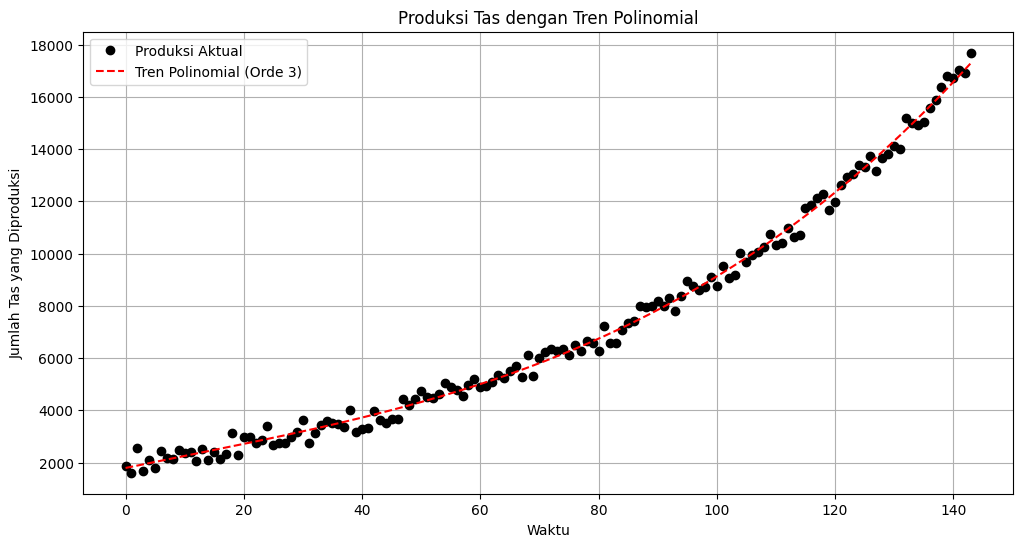

Polynomial Koefisien: ['0.004', '-0.123', '46.966', '1795.600']


In [20]:
# Problem 1: Polynomial Regression Model

# Ekstrak M 1 - 144 menjadi Array
arr_M = np.arange(len(data_produksi))

# Menyesuaikan polinomial derajat 3 menggunakan np.polyfit dan np.poly1d
orde = 3
koefisien = np.polyfit(arr_M, data_produksi, orde)
polynom = np.poly1d(koefisien)

# Mengevaluasi model polinomial
tren_produksi = polynom(arr_M)

# Plot data produksi dan tren polinomial
plt.figure(figsize=(12, 6))
plt.plot(arr_M, data_produksi, marker='o', linestyle='', color='k', label='Produksi Aktual')
plt.plot(arr_M, tren_produksi, linestyle='--', color='r', label=f'Tren Polinomial (Orde {orde})')
plt.title('Produksi Tas dengan Tren Polinomial')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Tas yang Diproduksi')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan koefisien polinomial dengan presisi tiga digit
print("Polynomial Koefisien:", [f"{koef:.3f}" for koef in koefisien])

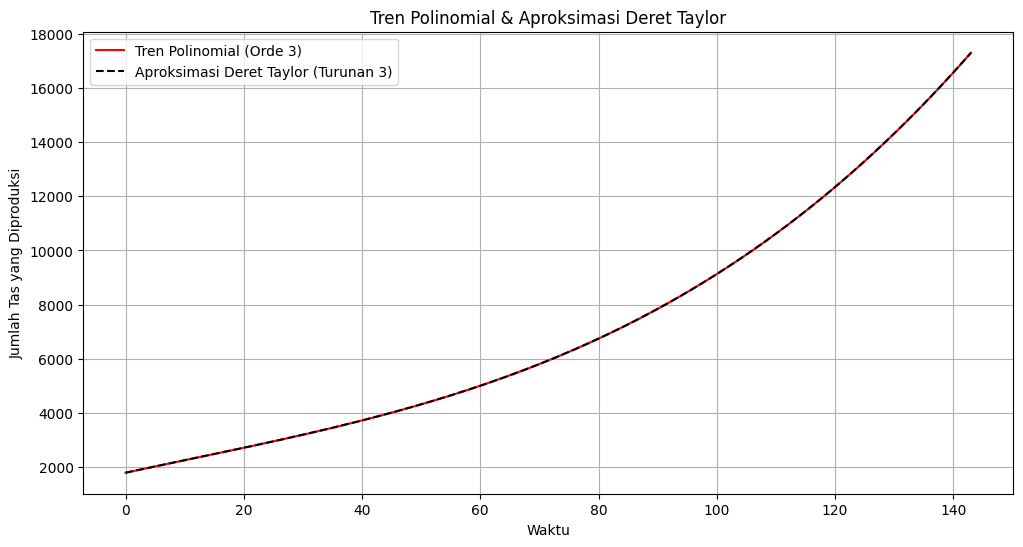

In [22]:
# Problem 2: Polynomial Function (Taylor Series Approximation)

def taylor_series(x, a, n):
    # Menghitung aproksimasi deret Taylor dari polinomial x) yang dipusatkan pada a hingga n suku.
    approximation = polynom(a)
    for i in range(1, n+1):
        term = (polynom.deriv(i)(a) * (x - a)**i) / math.factorial(i)
        approximation += term
    return approximation

a = arr_M[len(arr_M) // 2]  # Memusatkan di tengah
turunan = 3 # hingga turunan ketiga

# Menerapkan aproksimasi deret Taylor
produksi_taylor  = taylor_series(arr_M, a, turunan)

# Plot tren polinomial dan aproksimasi deret Taylor
plt.figure(figsize=(12, 6))
plt.plot(arr_M, tren_produksi, linestyle='-', color='r', label=f'Tren Polinomial (Orde {orde})')
plt.plot(arr_M, produksi_taylor, linestyle='--', color='k', label=f'Aproksimasi Deret Taylor (Turunan {turunan})')
plt.title('Tren Polinomial & Aproksimasi Deret Taylor')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Tas yang Diproduksi')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Problem 3: Warehouse Capacity Prediction using Newton-Raphson Method

def production_model(x):
    return taylor_series(x, a, turunan)

def root_function(x):
    return production_model(x) - 25000

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    # Metode Newton-Raphson untuk menemukan akar dari fungsi f.
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn
        Dfxn = df(xn)
        if Dfxn == 0:
            print("Turunan nol. Tidak ada solusi yang ditemukan.")
            return None
        xn = xn - fxn/Dfxn
    print("Melebihi iterasi maksimum. Tidak ada solusi yang ditemukan.")
    return None


# Mendefinisikan turunan dari fungsi akar
def derivative_root(x):
    return np.polyder(polynom)(x)

# Tebakan awal
tebakan_awal = arr_M[-1]

# Menemukan akar menggunakan metode Newton-Raphson
m_exceed = newton_raphson(root_function, derivative_root, tebakan_awal)

# Menghitung kapan harus mulai membangun gudang baru (13 bulan sebelum melebihi kapasitas)
mulai_bangun = m_exceed - 13

# Output hasil dengan presisi tiga digit
print(f"Hasil Root (ketika produksi melebihi 25,000 tas) : {m_exceed:.3f} >> M-{math.ceil(m_exceed)}")
print(f"Mulai membangun gudang pada (Dikurangi 13) : {mulai_bangun:.3f} >> M-{math.ceil(mulai_bangun)} ")

Hasil Root (ketika produksi melebihi 25,000 tas) : 169.374 >> M-170
Mulai membangun gudang pada (Dikurangi 13) : 156.374 >> M-157 
